In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
%pwd
%cd ..

/Users/ENZO/KOOKIZ/GITHUB/translate-handsign


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
actions = ["가렵다", "답답하다", "땀난다", "떨린다", "베였다", "부었다", "불편하다", "숨가쁘다", "아프다",
        "어지럽다", "열", "지속된다", "찔렸다", "피", "피곤하다", "힘들다"]
time_num, time_num1, time_num2 = '1744785793', '1744785976', '1744786162'

for time_num in [time_num, time_num1, time_num2]:
    data = np.concatenate([
        np.load(f'dataset/seq_아프다_{time_num}.npy'),
        np.load(f'dataset/seq_열_{time_num}.npy'),
        np.load(f'dataset/seq_가렵다_{time_num}.npy'),
        np.load(f'dataset/seq_답답하다_{time_num}.npy'),
        np.load(f'dataset/seq_땀난다_{time_num}.npy'),
        np.load(f'dataset/seq_떨린다_{time_num}.npy'),
        np.load(f'dataset/seq_베였다_{time_num}.npy'),
        np.load(f'dataset/seq_부었다_{time_num}.npy'),
        np.load(f'dataset/seq_불편하다_{time_num}.npy'),
        np.load(f'dataset/seq_숨가쁘다_{time_num}.npy'),
        np.load(f'dataset/seq_어지럽다_{time_num}.npy'),
        np.load(f'dataset/seq_지속된다_{time_num}.npy'),
        np.load(f'dataset/seq_찔렸다_{time_num}.npy'),
        np.load(f'dataset/seq_피_{time_num}.npy'),
        np.load(f'dataset/seq_피곤하다_{time_num}.npy'),
        np.load(f'dataset/seq_힘들다_{time_num}.npy')
    ], axis=0)

data.shape

(600, 10, 56)

In [4]:
print(np.load(f'dataset/seq_아프다_1744773358.npy').shape)
print(np.load(f'dataset/seq_열_1744773358.npy').shape)
print(np.load(f'dataset/seq_기침_1744773358.npy').shape)
print(np.load(f'dataset/seq_콧물_1744773358.npy').shape)
print(np.load(f'dataset/seq_코막힘_1744773358.npy').shape)
print(np.load(f'dataset/seq_머리_1744773358.npy').shape)
print(np.load(f'dataset/seq_배_1744773358.npy').shape)
print(np.load(f'dataset/seq_설사_1744773358.npy').shape)
print(np.load(f'dataset/seq_변비_1744773358.npy').shape)
print(np.load(f'dataset/seq_구토_1744773358.npy').shape)

(40, 10, 56)
(57, 10, 56)
(23, 10, 56)
(25, 10, 56)
(32, 10, 56)
(19, 10, 56)
(23, 10, 56)
(44, 10, 56)
(26, 10, 56)
(14, 10, 56)


In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(600, 10, 55)
(600,)


In [5]:
labels

array([ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2

In [6]:
len(labels)

600

In [7]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [8]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(600, 16)

In [9]:
y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(480, 10, 55) (480, 16)
(120, 10, 55) (120, 16)


In [11]:
x_train.shape[1:3]

(10, 55)

In [12]:
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [13]:
# custom f1 score
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',metric_F1score])
model.summary()

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        30,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,328 (130.19 KB)

 Trainable params: 33,328 (130.19 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'max')


history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/multi_hand_gesture_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    ]
)

Epoch 1/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 0.0625 - loss: 21.3768 - metric_f1score: 0.0678
Epoch 1: val_acc improved from -inf to 0.19167, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.0800 - loss: 21.3542 - metric_f1score: nan - val_acc: 0.1917 - val_loss: 7.3905 - val_metric_f1score: 0.1323 - learning_rate: 0.0010
Epoch 2/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.1250 - loss: 16.0255 - metric_f1score: 0.0816
Epoch 2: val_acc improved from 0.19167 to 0.31667, saving model to models/multi_hand_gesture_classifier.h5


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate.
  callback.on_epoch_end(epoch, logs)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate
  current = self.get_monitor_value(logs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.1177 - loss: 11.0866 - metric_f1score: nan - val_acc: 0.3167 - val_loss: 4.8479 - val_metric_f1score: 0.1998 - learning_rate: 0.0010
Epoch 3/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.0938 - loss: 8.8347 - metric_f1score: 0.0889
Epoch 3: val_acc improved from 0.31667 to 0.45833, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.1577 - loss: 7.2013 - metric_f1score: 0.1200 - val_acc: 0.4583 - val_loss: 4.1797 - val_metric_f1score: 0.3725 - learning_rate: 0.0010
Epoch 4/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.2500 - loss: 4.5443 - metric_f1score: 0.2791
Epoch 4: val_acc improved from 0.45833 to 0.54167, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2688 - loss: 5.4761 - metric_f1score: 0.2563 - val_acc: 0.5417 - val_loss: 3.6830 - val_metric_f1score: 0.4158 - learning_rate: 0.0010
Epoch 5/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.1875 - loss: 5.1988 - metric_f1score: 0.1429
Epoch 5: val_acc improved from 0.54167 to 0.57500, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2870 - loss: 4.5082 - metric_f1score: 0.2326 - val_acc: 0.5750 - val_loss: 3.3024 - val_metric_f1score: 0.4595 - learning_rate: 0.0010
Epoch 6/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.1875 - loss: 4.6708 - metric_f1score: 0.0976
Epoch 6: val_acc improved from 0.57500 to 0.61667, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2969 - loss: 4.1905 - metric_f1score: 0.2330 - val_acc: 0.6167 - val_loss: 2.9228 - val_metric_f1score: 0.6156 - learning_rate: 0.0010
Epoch 7/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.1875 - loss: 4.2716 - metric_f1score: 0.2791
Epoch 7: val_acc improved from 0.61667 to 0.66667, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3425 - loss: 3.7332 - metric_f1score: 0.3708 - val_acc: 0.6667 - val_loss: 2.5575 - val_metric_f1score: 0.6373 - learning_rate: 0.0010
Epoch 8/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.2812 - loss: 3.8856 - metric_f1score: 0.2381
Epoch 8: val_acc improved from 0.66667 to 0.70833, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4391 - loss: 3.2965 - metric_f1score: 0.4190 - val_acc: 0.7083 - val_loss: 2.3481 - val_metric_f1score: 0.7142 - learning_rate: 0.0010
Epoch 9/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 0.2500 - loss: 3.2505 - metric_f1score: 0.2381
Epoch 9: val_acc improved from 0.70833 to 0.72500, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4681 - loss: 3.0248 - metric_f1score: 0.4843 - val_acc: 0.7250 - val_loss: 2.1818 - val_metric_f1score: 0.7497 - learning_rate: 0.0010
Epoch 10/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3750 - loss: 2.9808 - metric_f1score: 0.4444
Epoch 10: val_acc improved from 0.72500 to 0.74167, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5117 - loss: 2.6859 - metric_f1score: 0.5429 - val_acc: 0.7417 - val_loss: 2.0602 - val_metric_f1score: 0.7755 - learning_rate: 0.0010
Epoch 11/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.4062 - loss: 2.8460 - metric_f1score: 0.4082
Epoch 11: val_acc improved from 0.74167 to 0.78333, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5115 - loss: 2.7273 - metric_f1score: 0.5068 - val_acc: 0.7833 - val_loss: 1.9366 - val_metric_f1score: 0.7811 - learning_rate: 0.0010
Epoch 12/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.5000 - loss: 2.7073 - metric_f1score: 0.5000
Epoch 12: val_acc did not improve from 0.78333
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5595 - loss: 2.5123 - metric_f1score: 0.5654 - val_acc: 0.7833 - val_loss: 1.8675 - val_metric_f1score: 0.7859 - learning_rate: 0.0010
Epoch 13/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5312 - loss: 2.7352 - metric_f1score: 0.5417
Epoch 13: val_acc improved from 0.78333 to 0.82500, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5967 - loss: 2.4223 - metric_f1score: 0.6222 - val_acc: 0.8250 - val_loss: 1.7334 - val_metric_f1score: 0.8324 - learning_rate: 0.0010
Epoch 14/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5000 - loss: 2.4398 - metric_f1score: 0.5000
Epoch 14: val_acc did not improve from 0.82500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6106 - loss: 2.2894 - metric_f1score: 0.6237 - val_acc: 0.8083 - val_loss: 1.6589 - val_metric_f1score: 0.8417 - learning_rate: 0.0010
Epoch 15/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5000 - loss: 2.1197 - metric_f1score: 0.5714
Epoch 15: val_acc did not improve from 0.82500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6347 - loss: 2.0903 - metric_f1score: 0.6550 - val_acc: 0.8167 - val_loss: 1.5919 - val_metric_f1score: 0.8511 - learning_rate: 0.0010
Epoch 16/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6562 - loss: 2.2633 - metric_f1score: 0.6538
Epoch 16: val_acc improved from 0.82

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6914 - loss: 1.9651 - metric_f1score: 0.7124 - val_acc: 0.8500 - val_loss: 1.4941 - val_metric_f1score: 0.8760 - learning_rate: 0.0010
Epoch 17/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.5625 - loss: 2.2052 - metric_f1score: 0.6296
Epoch 17: val_acc improved from 0.85000 to 0.85833, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7019 - loss: 1.9985 - metric_f1score: 0.7223 - val_acc: 0.8583 - val_loss: 1.4793 - val_metric_f1score: 0.8574 - learning_rate: 0.0010
Epoch 18/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.6250 - loss: 2.2254 - metric_f1score: 0.6000
Epoch 18: val_acc did not improve from 0.85833
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7121 - loss: 1.8857 - metric_f1score: 0.7250 - val_acc: 0.8583 - val_loss: 1.4091 - val_metric_f1score: 0.8914 - learning_rate: 0.0010
Epoch 19/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6562 - loss: 2.0657 - metric_f1score: 0.6909
Epoch 19: val_acc did not improve from 0.85833
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7070 - loss: 1.8327 - metric_f1score: 0.7407 - val_acc: 0.8333 - val_loss: 1.4308 - val_metric_f1score: 0.8760 - learning_rate: 0.0010
Epoch 20/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7188 - loss: 1.7699 - metric_f1score: 0.7586
Epoch 20: val_acc improved from 0.85

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7955 - loss: 1.6538 - metric_f1score: 0.7940 - val_acc: 0.8917 - val_loss: 1.3159 - val_metric_f1score: 0.8929 - learning_rate: 0.0010
Epoch 21/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6250 - loss: 1.8638 - metric_f1score: 0.6780
Epoch 21: val_acc improved from 0.89167 to 0.90833, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7544 - loss: 1.6620 - metric_f1score: 0.7728 - val_acc: 0.9083 - val_loss: 1.2565 - val_metric_f1score: 0.9093 - learning_rate: 0.0010
Epoch 22/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - acc: 0.6562 - loss: 1.9757 - metric_f1score: 0.7170
Epoch 22: val_acc did not improve from 0.90833
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7527 - loss: 1.7138 - metric_f1score: 0.7892 - val_acc: 0.9083 - val_loss: 1.2311 - val_metric_f1score: 0.9055 - learning_rate: 0.0010
Epoch 23/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.5938 - loss: 2.0180 - metric_f1score: 0.6538
Epoch 23: val_acc did not improve from 0.90833
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7344 - loss: 1.6286 - metric_f1score: 0.7741 - val_acc: 0.8833 - val_loss: 1.2068 - val_metric_f1score: 0.8974 - learning_rate: 0.0010
Epoch 24/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7188 - loss: 1.7265 - metric_f1score: 0.7586
Epoch 24: val_acc did not improve fr

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8153 - loss: 1.4668 - metric_f1score: 0.8353 - val_acc: 0.9167 - val_loss: 1.1418 - val_metric_f1score: 0.9225 - learning_rate: 0.0010
Epoch 27/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6562 - loss: 1.7543 - metric_f1score: 0.6667
Epoch 27: val_acc improved from 0.91667 to 0.92500, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7996 - loss: 1.4885 - metric_f1score: 0.8105 - val_acc: 0.9250 - val_loss: 1.0859 - val_metric_f1score: 0.9270 - learning_rate: 0.0010
Epoch 28/200
 9/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8046 - loss: 1.3851 - metric_f1score: 0.8231 
Epoch 28: val_acc did not improve from 0.92500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8153 - loss: 1.3559 - metric_f1score: 0.8324 - val_acc: 0.9083 - val_loss: 1.0893 - val_metric_f1score: 0.9116 - learning_rate: 0.0010
Epoch 29/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7500 - loss: 1.6133 - metric_f1score: 0.7857
Epoch 29: val_acc did not improve from 0.92500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8375 - loss: 1.3478 - metric_f1score: 0.8458 - val_acc: 0.9167 - val_loss: 1.0875 - val_metric_f1score: 0.9308 - learning_rate: 0.0010
Epoch 30/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6875 - loss: 1.5653 - metric_f1score: 0.7636
Epoch 30: val_acc improved from 0.92

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7955 - loss: 1.3664 - metric_f1score: 0.8264 - val_acc: 0.9333 - val_loss: 1.0141 - val_metric_f1score: 0.9359 - learning_rate: 0.0010
Epoch 31/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9062 - loss: 1.2270 - metric_f1score: 0.8966
Epoch 31: val_acc did not improve from 0.93333
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8727 - loss: 1.2408 - metric_f1score: 0.8752 - val_acc: 0.9333 - val_loss: 0.9861 - val_metric_f1score: 0.9500 - learning_rate: 0.0010
Epoch 32/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7812 - loss: 1.4061 - metric_f1score: 0.7931
Epoch 32: val_acc did not improve from 0.93333
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8600 - loss: 1.2485 - metric_f1score: 0.8812 - val_acc: 0.9333 - val_loss: 0.9655 - val_metric_f1score: 0.9541 - learning_rate: 0.0010
Epoch 33/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9062 - loss: 1.1548 - metric_f1score: 0.9333
Epoch 33: val_acc improved from 0.93

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8515 - loss: 1.2427 - metric_f1score: 0.8698 - val_acc: 0.9667 - val_loss: 0.9581 - val_metric_f1score: 0.9544 - learning_rate: 0.0010
Epoch 34/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8438 - loss: 1.2952 - metric_f1score: 0.8475
Epoch 34: val_acc improved from 0.96667 to 0.97500, saving model to models/multi_hand_gesture_classifier.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8791 - loss: 1.1697 - metric_f1score: 0.8893 - val_acc: 0.9750 - val_loss: 0.9518 - val_metric_f1score: 0.9500 - learning_rate: 0.0010
Epoch 35/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.7500 - loss: 1.4552 - metric_f1score: 0.8136
Epoch 35: val_acc did not improve from 0.97500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8654 - loss: 1.1905 - metric_f1score: 0.8900 - val_acc: 0.9417 - val_loss: 0.9491 - val_metric_f1score: 0.9541 - learning_rate: 0.0010
Epoch 36/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8750 - loss: 1.1289 - metric_f1score: 0.9333
Epoch 36: val_acc did not improve from 0.97500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8778 - loss: 1.1547 - metric_f1score: 0.9016 - val_acc: 0.9667 - val_loss: 0.9252 - val_metric_f1score: 0.9544 - learning_rate: 0.0010
Epoch 37/200
 6/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8206 - loss: 1.3417 - metric_f1score: 0.8367
Epoch 37: val_acc did not improve fr

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9053 - loss: 1.0156 - metric_f1score: 0.9042 - val_acc: 0.9917 - val_loss: 0.8155 - val_metric_f1score: 0.9746 - learning_rate: 0.0010
Epoch 42/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8438 - loss: 1.1996 - metric_f1score: 0.8667
Epoch 42: val_acc did not improve from 0.99167
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8734 - loss: 1.1442 - metric_f1score: 0.8816 - val_acc: 0.9917 - val_loss: 0.8110 - val_metric_f1score: 0.9666 - learning_rate: 0.0010
Epoch 43/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8125 - loss: 1.2693 - metric_f1score: 0.8621
Epoch 43: val_acc did not improve from 0.99167
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8694 - loss: 1.0952 - metric_f1score: 0.8960 - val_acc: 0.9917 - val_loss: 0.8081 - val_metric_f1score: 0.9666 - learning_rate: 0.0010
Epoch 44/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9062 - loss: 0.9844 - metric_f1score: 0.8852
Epoch 44: val_acc improved from 0.99

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9165 - loss: 0.9683 - metric_f1score: 0.9140 - val_acc: 1.0000 - val_loss: 0.7855 - val_metric_f1score: 0.9746 - learning_rate: 0.0010
Epoch 45/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8438 - loss: 1.2358 - metric_f1score: 0.8621
Epoch 45: val_acc did not improve from 1.00000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9277 - loss: 0.9523 - metric_f1score: 0.9314 - val_acc: 0.9917 - val_loss: 0.8147 - val_metric_f1score: 0.9639 - learning_rate: 0.0010
Epoch 46/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8438 - loss: 1.3308 - metric_f1score: 0.8475
Epoch 46: val_acc did not improve from 1.00000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9042 - loss: 1.0234 - metric_f1score: 0.9046 - val_acc: 0.9833 - val_loss: 0.7895 - val_metric_f1score: 0.9639 - learning_rate: 0.0010
Epoch 47/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8750 - loss: 1.0158 - metric_f1score: 0.8667
Epoch 47: val_acc did not improve fr

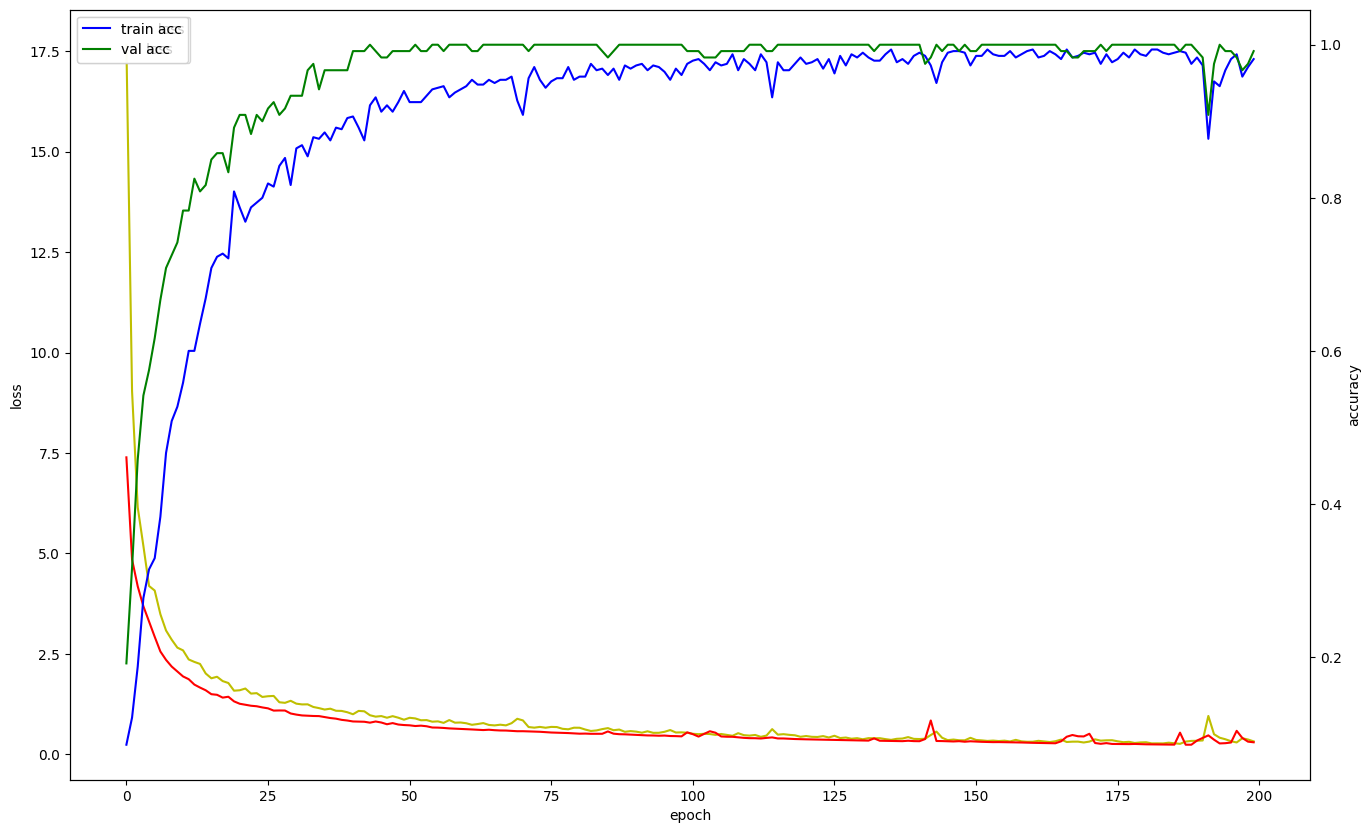

In [16]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

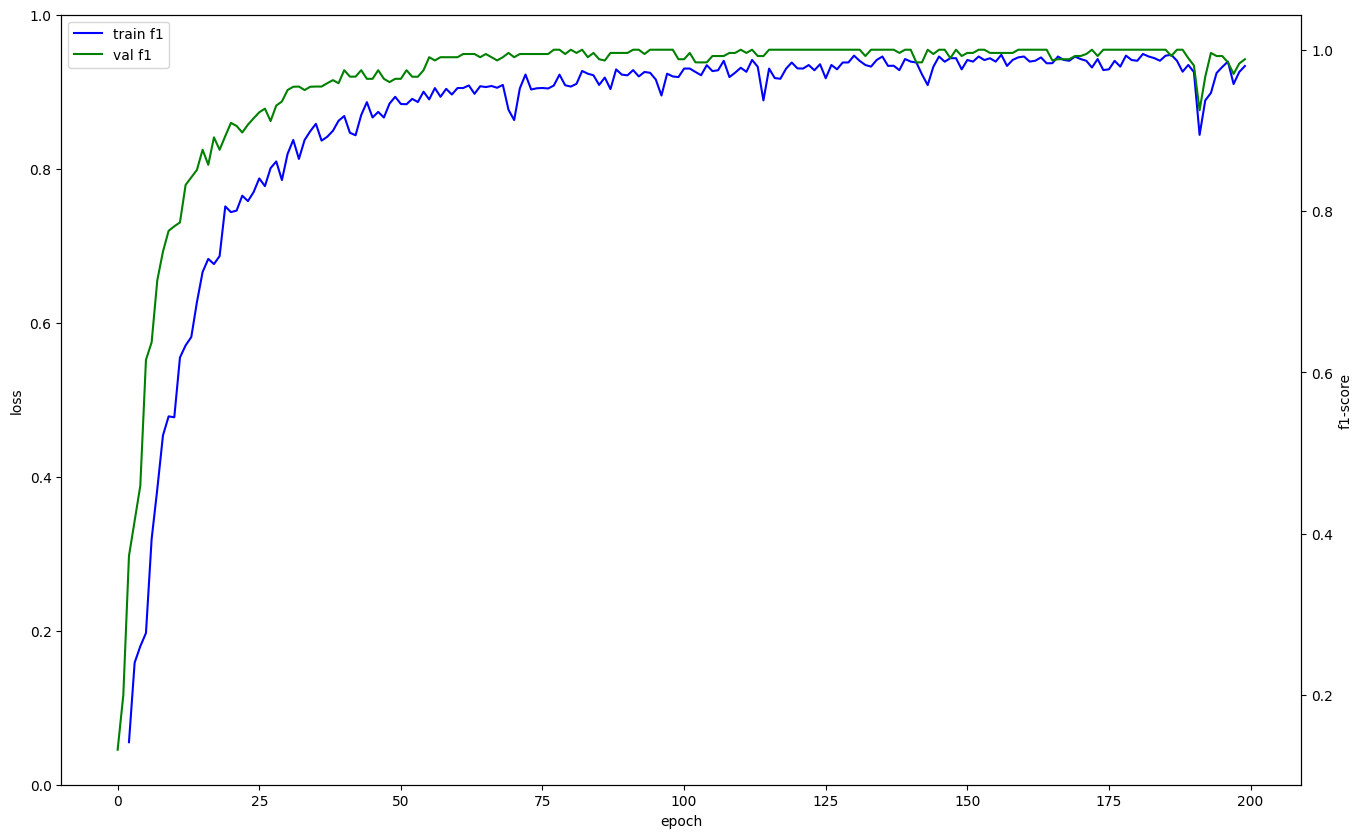

In [17]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['metric_f1score'], 'b', label='train f1')
acc_ax.plot(history.history['val_metric_f1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [18]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[[113,   0],
        [  0,   7]],

       [[115,   0],
        [  0,   5]],

       [[113,   0],
        [  0,   7]],

       [[114,   0],
        [  0,   6]],

       [[114,   0],
        [  0,   6]],

       [[112,   0],
        [  0,   8]],

       [[117,   0],
        [  0,   3]],

       [[118,   0],
        [  0,   2]],

       [[113,   0],
        [  0,   7]],

       [[ 97,   0],
        [  0,  23]],

       [[108,   0],
        [  0,  12]],

       [[115,   0],
        [  0,   5]],

       [[115,   0],
        [  0,   5]],

       [[114,   0],
        [  0,   6]],

       [[107,   0],
        [  0,  13]],

       [[115,   0],
        [  0,   5]]])

In [19]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[113,   0],
        [  0,   7]],

       [[115,   0],
        [  0,   5]],

       [[113,   0],
        [  0,   7]],

       [[114,   0],
        [  0,   6]],

       [[114,   0],
        [  0,   6]],

       [[112,   0],
        [  0,   8]],

       [[117,   0],
        [  0,   3]],

       [[118,   0],
        [  0,   2]],

       [[113,   0],
        [  0,   7]],

       [[ 97,   0],
        [  0,  23]],

       [[108,   0],
        [  0,  12]],

       [[115,   0],
        [  0,   5]],

       [[115,   0],
        [  0,   5]],

       [[114,   0],
        [  0,   6]],

       [[107,   0],
        [  0,  13]],

       [[115,   0],
        [  0,   5]]])

In [20]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[[113,   0],
        [  0,   7]],

       [[115,   0],
        [  0,   5]],

       [[113,   0],
        [  0,   7]],

       [[114,   0],
        [  0,   6]],

       [[114,   0],
        [  0,   6]],

       [[112,   0],
        [  0,   8]],

       [[117,   0],
        [  0,   3]],

       [[118,   0],
        [  0,   2]],

       [[113,   0],
        [  0,   7]],

       [[ 97,   0],
        [  0,  23]],

       [[108,   0],
        [  0,  12]],

       [[115,   0],
        [  0,   5]],

       [[115,   0],
        [  0,   5]],

       [[114,   0],
        [  0,   6]],

       [[107,   0],
        [  0,  13]],

       [[115,   0],
        [  0,   5]]])

In [21]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 1. TF Lite 기본 연산 + Select TF ops 사용
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# 2. TensorList lowering 비활성화
converter._experimental_lower_tensor_list_ops = False

# 변환 실행
tflite_model = converter.convert()

# 모델 저장
with open('models/multi_hand_gesture_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpfxcv0nw_/assets


INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpfxcv0nw_/assets


Saved artifact at '/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpfxcv0nw_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 55), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 16), dtype=tf.float32, name=None)
Captures:
  13180566368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13180590688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13180595792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13172334912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13172332448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13172339488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13172442912: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1744786240.138971  116609 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744786240.139201  116609 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-16 15:50:40.139446: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpfxcv0nw_
2025-04-16 15:50:40.139935: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-16 15:50:40.139940: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpfxcv0nw_
I0000 00:00:1744786240.144858  116609 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-16 15:50:40.145538: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-16 15:50:40.176801: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder